In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
dataset = pd.read_csv('/content/chess_games.csv')

In [53]:
dataset.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [54]:
dataset.isnull().sum()

game_id                  0
rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

In [55]:
print(dataset.shape[0])
print(dataset.dtypes)

20058
game_id               int64
rated                  bool
turns                 int64
victory_status       object
winner               object
time_increment       object
white_id             object
white_rating          int64
black_id             object
black_rating          int64
moves                object
opening_code         object
opening_moves         int64
opening_fullname     object
opening_shortname    object
opening_response     object
opening_variation    object
dtype: object


In [56]:
dataset = dataset.drop('opening_response', axis = 1)
dataset = dataset.drop('opening_variation', axis = 1)

In [57]:
dataset = dataset.drop(['game_id','white_id', 'black_id'], axis = 1)
dataset = dataset.drop('moves', axis = 1)
dataset = dataset.drop(['opening_code', 'opening_fullname'], axis = 1)
dataset = dataset.drop('opening_moves', axis = 1)
dataset = dataset.drop('opening_shortname', axis = 1)
dataset = dataset.drop('rated', axis = 1)
dataset = dataset.drop('white_rating', axis = 1)
dataset = dataset.drop('black_rating', axis = 1)

In [58]:
dataset.head()

,turns,victory_status,winner,time_increment
0,13,Out of Time,White,15+2
1,16,Resign,Black,5+10
2,61,Mate,White,5+10
3,61,Mate,White,20+0
4,95,Mate,White,30+3


In [59]:
dataset['time_increment'] = dataset['time_increment'].apply(lambda x: int(x.split('+')[0]) + int(x.split('+')[1]))

In [60]:
victory_status_map = {'Out of Time': 2.0, 'Resign': 0.0, 'Mate': 3.0, 'Draw': 1.0}
dataset['victory_status'] = dataset['victory_status'].map(victory_status_map)
winner_map = {'White': 1.0, 'Black': 0.0, 'Draw': 2.0}
dataset['winner'] = dataset['winner'].map(winner_map)

In [61]:
dataset.head()

,turns,victory_status,winner,time_increment
0,13,2.0,1.0,17
1,16,0.0,0.0,15
2,61,3.0,1.0,15
3,61,3.0,1.0,20
4,95,3.0,1.0,33


In [62]:
from sklearn.model_selection import train_test_split
X = dataset[['turns', 'victory_status','time_increment']]
y = dataset['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [63]:
dataset.head()

,turns,victory_status,winner,time_increment
0,13,2.0,1.0,17
1,16,0.0,0.0,15
2,61,3.0,1.0,15
3,61,3.0,1.0,20
4,95,3.0,1.0,33


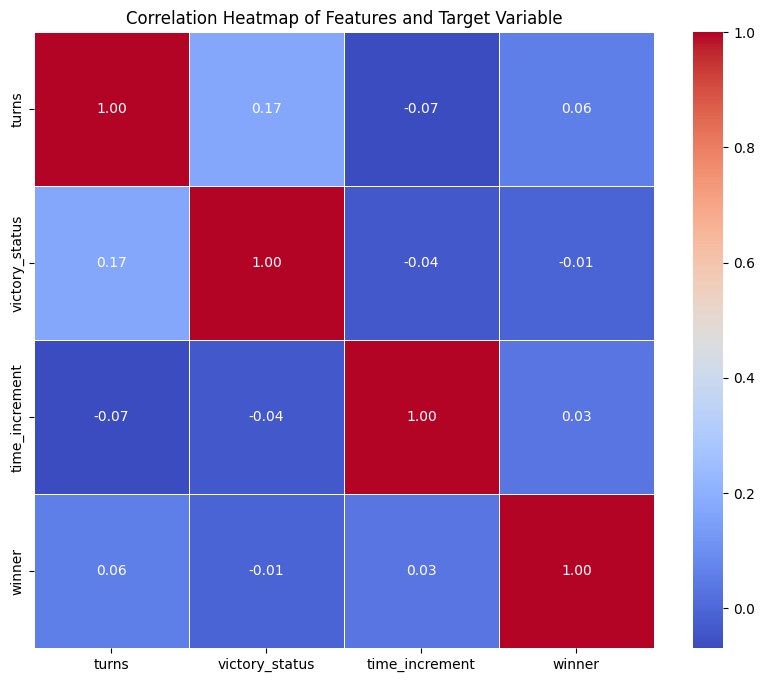

In [64]:
dataset = pd.concat([X, y], axis=1)

corr_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features and Target Variable')
plt.show()

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors:")
print("Accuracy score: {:.2f}".format(accuracy_knn))

K-Nearest Neighbors:
Accuracy score: 0.74


In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print('K-Nearest Neighbors:')
print(classification_report(y_test, y_pred))

K-Nearest Neighbors:
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74      2738
         1.0       0.75      0.78      0.77      2992
         2.0       0.75      0.24      0.36       288

    accuracy                           0.74      6018
   macro avg       0.74      0.59      0.62      6018
weighted avg       0.74      0.74      0.74      6018



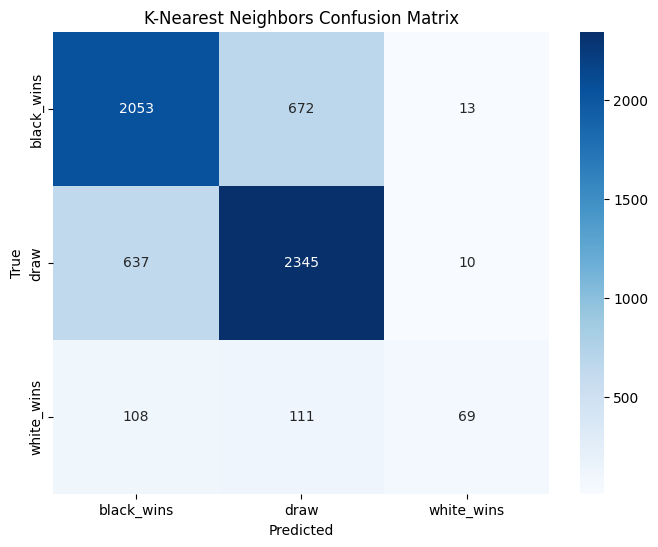

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['black_wins', 'draw', 'white_wins']

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.show()

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred)
print("Decision Tree:")
print("Accuracy score: {:.2f}".format(accuracy_tree))

Decision Tree:
Accuracy score: 0.88


In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print("Decision Tree:")
print(classification_report(y_test, y_pred))

Decision Tree:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      2738
         1.0       0.88      0.89      0.88      2992
         2.0       0.99      0.97      0.98       288

    accuracy                           0.88      6018
   macro avg       0.91      0.91      0.91      6018
weighted avg       0.88      0.88      0.88      6018



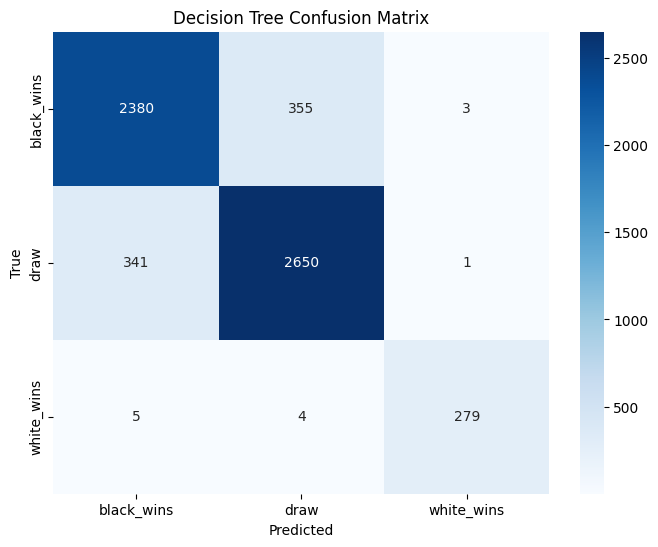

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['black_wins', 'draw', 'white_wins']

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg=LogisticRegression()
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)
accuracy_lg = accuracy_score(y_test, y_pred)
print("Logistic Regression:")
print("Accuracy score: {:.2f}".format(accuracy_lg))

Logistic Regression:
Accuracy score: 0.50


In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print("Logistic Regression:")
print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.43      0.16      0.23      2738
         1.0       0.51      0.86      0.64      2992
         2.0       0.38      0.01      0.02       288

    accuracy                           0.50      6018
   macro avg       0.44      0.34      0.30      6018
weighted avg       0.47      0.50      0.42      6018



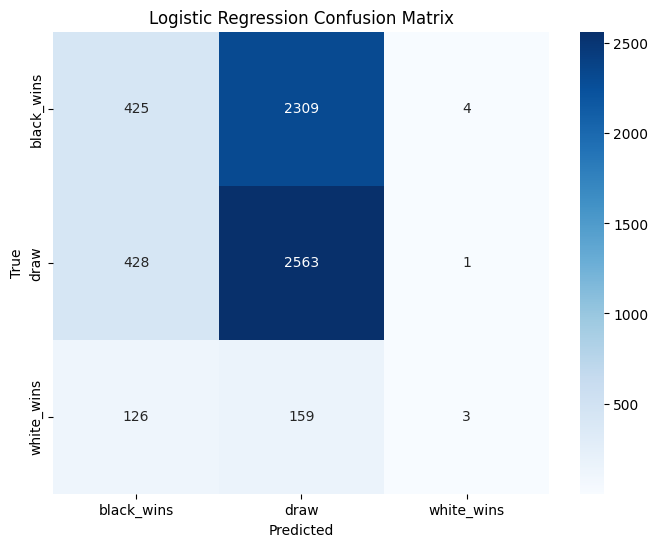

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['black_wins', 'draw', 'white_wins']

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.show()

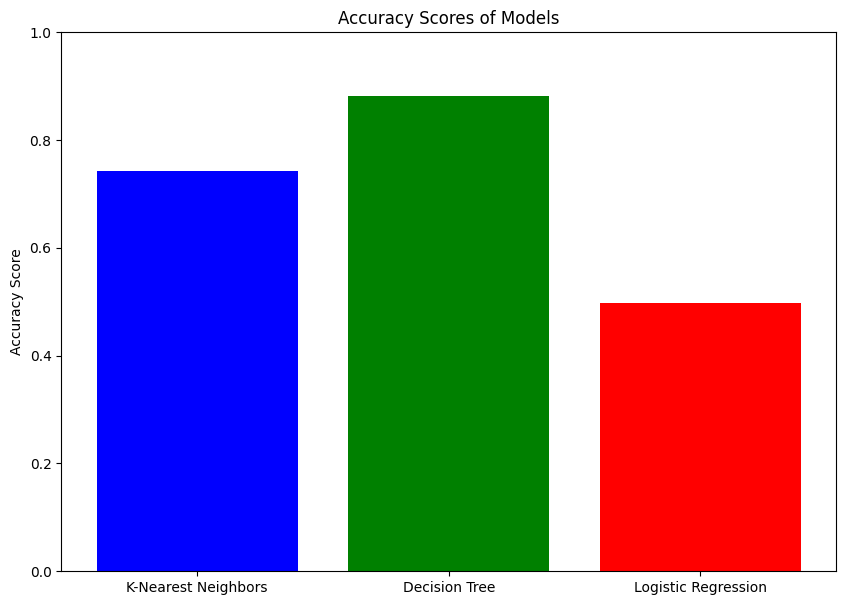

In [74]:
import matplotlib.pyplot as plt

accuracy_scores = [accuracy_knn, accuracy_tree, accuracy_lg]
classifiers = ['K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression']

plt.figure(figsize=(10, 7))
plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Models')
plt.ylim(0, 1)
plt.show()